# PDE-based image compression

## 1.- Carga la imagen original que va ser comprimida

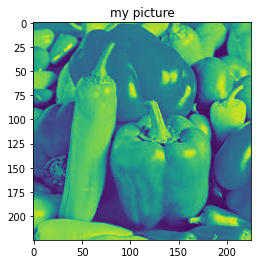

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

img = cv2.imread('peppers_color.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.title('my picture')
plt.show()


## 2.- El primer paso para comprimir la imagen es encontrar los bordes

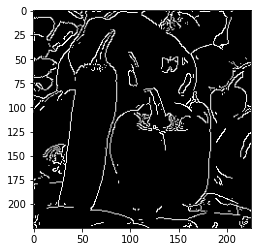

In [69]:
#encuentra los bordes de la imagen y crea una variable "bordes" de las mismas dimensiones de la imagen
#con 255's en aquellos pixeles que pertenecen a un borde y
#con 0's en aquellos que no pertenecen a un borde
bordes = cv2.Canny(img,180,200)
plt.imshow(bordes,cmap='gray')
plt.show()


## 3.- El segundo paso es añadir pixeles de forma aleatoria.
### $\rightarrow$ Cambiando el valor de la variable VAL, se pueden obtener mayor o menor compresión. $\leftarrow$

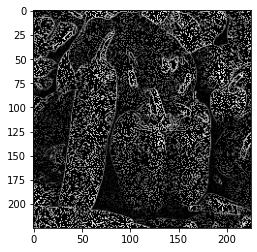

Número de pixeles removidos de la imagen: 35051
Número de pixeles totales en la imagen: 50625
Porcentaje de compresión:69.23654320987654%


In [70]:
#define el "porcentaje" de pixeles que serán eliminados de la imagen
VAL=0.75
m,n = img.shape
var_aleatoria=np.random.random_sample((m,n))
#crea la imagen comprimida "img_compressed", esto es, todos los pixeles que no sean borde o 
#hayan sido seleccionados aleatoriamente, se ponen a cero.
itemindex = np.where((bordes<200) & (var_aleatoria<VAL))
img_compressed=np.copy(img)
img_compressed[itemindex]=0
plt.imshow(img_compressed,cmap='gray')
plt.show()

totalpixeles=m*n
removidos=len(np.where(img_compressed==0)[0])
porcentaje= 100*removidos/totalpixeles   
print('Número de pixeles removidos de la imagen: %i' % removidos)
print('Número de pixeles totales en la imagen: %i' % totalpixeles)
print('Porcentaje de compresión:'+ str(porcentaje) + '%')

## 4.-Crea la imagen que será reconstruída.

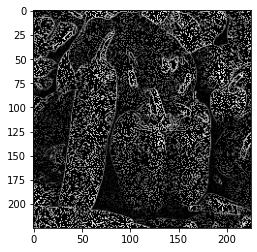

In [71]:
#crea la imagen que será reconstruída "img_rec" (copia de img_compressed)
img_rec=np.copy(img_compressed)
m,n = img_rec.shape
plt.imshow(img_rec,cmap='gray')
plt.show()

## 5.- Crea la función indicadora de los pixeles conocidos

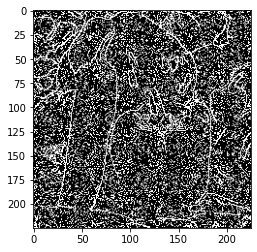

In [72]:
#cx=1 si el pixel es conocido, cx=0 si el pixel es desconocido
cx=np.ones((m,n))
cx[itemindex]=0
plt.imshow(cx,cmap='gray')
plt.show()

## 6.- Implementa la PDE de reconstrucción

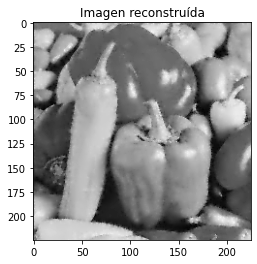

In [73]:
#Resuelve la PDE basada en la ecuación de calor usando el método de descenso de gradiente
timestep=0.1
MAX=1000
for k in range(MAX):
    fi = np.vstack ((img_rec[1:m,:]-img_rec[:m-1,:], np.zeros(n)))
    fj = np.hstack ((img_rec[:,1:n]-img_rec[:,:n-1], np.zeros(m).reshape(m,1)))
    bi = np.vstack ((np.zeros(n), fi[1:m,:]-fi[:m-1,:]))
    bj = np.hstack ((np.zeros(m).reshape(m,1), fj[:,1:n]-fj[:,:n-1]))
    #calcula el Laplaciano
    laplaciano= bi+bj
    residual = (1-cx)*laplaciano - (cx)*(img_rec-img_compressed)
    # Actualiza imagen con descenso de gradiente
    img_rec = img_rec + timestep*residual
    
# despliega el resultado    
plt.imshow(img_rec,cmap='gray')
plt.title('Imagen reconstruída')
plt.show()

In [74]:
#Calcula el Peak Signal to Noise Ratio (PSNR) 
#que es una medida para saber que tan parecidas son dos imagenes
#cuando dos imágenes son idénticas el PSNR=100
mse = np.mean( (img - img_rec) ** 2 )
if mse == 0:
    print('PSNR = 100')
else:
    PIXEL_MAX = 255.0
    psnr=20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    print('PSNR= %f' % psnr )

PSNR= 28.991819
